In [7]:
%help

The following SysML v2 magic commands are available.
For help on a specific command, use "%help <COMMAND>" or "%<cmd> -h".

%eval		Evaluate a given expression.
%export		Save a file of the JSON representation of the abstract syntax tree rooted in the named element.
%help		Get a list of available commands or help on a specific command
%list		List loaded library packages or the results of a given query
%show		Print the abstract syntax tree rooted in a named element
%publish	Publish to the repository the modele elements rooted in a named element
%view		Render the view specified by the named view usage
%viz		Visualize the name model elements


In [5]:
%help %viz

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

In [403]:
package Batmobile_Architecture {    
    package Stage_1_Capability {
        /* comment
        What the system does in the context

        Scope:
        capability concept definition */
    }
    comment about Stage_1_Capability /* comment not in scope */ 
    package Stage_2_Operational {
        /* comment
        How the system is going to be used?
        
        Scope:
        operational use cases
        operational scenarios
        operational mission */
    }
    package Stage_3_Logical {
        /* comment
        What the system does?

        Scope:
        functional decomposition
        functional interfaces
        functional flows (energy, heat, matter, etc.)
        behaviours */
    }
    package Stage_4_Physical {
        /*  comment
        How the system does it?
            
        Scope:
        physical breakdown
        physical interfaces (connectors)
        physical flows
        physical constrains
        mapping to logical stage */

        package Definitions {
            part def Vehicle {
                item driver;
                part engine;
                attribute actualSpeed : SI::SpeedUnit;
            }
            part def Batmobile specializes Vehicle {
                part batmobileEngine redefines engine {
                    port enginePort : ~PowerIP;
                } 
                part seat[2];
                part body;
                part wheels[4] : Wheel;
                part frontLeftWheel subsets wheels;
                part frontRightWheel subsets wheels;
                part battery {
                    port powerPort : PowerIP;
                    attribute capacity;
                }
                interface battery2engine : PowerInterface connect 
                    battery.powerPort to batmobileEngine.enginePort;
            }
            part def BatmobileNG specializes Batmobile {
                part bulletProofWheels[4] redefines wheels;
            }
            part def Wheel {
                attribute pressure;
            }
            port def PowerIP {
                out item power : Power;
            }
            item def Power {
                attribute value;
            }
            interface def PowerInterface {
                end supplierPort : PowerIP;
                end consumerPort : ~PowerIP;
                flow of Power from supplierPort.power to consumerPort.power;
            }
        }
        package Physical_Breakdown {
            
        }   
    }
}

Package Batmobile_Architecture (dbf2a8e3-1c59-41b2-b515-a8f03bb175a5)


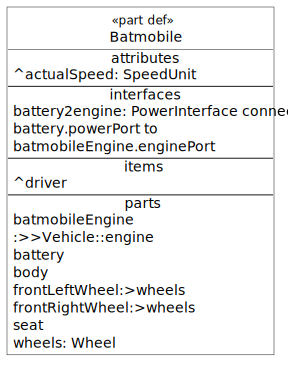

In [405]:
%viz --view=TREE --style=LR --style=COMPMOST --style=SHOWINHERITED Batmobile_Architecture::Stage_4_Physical::Definitions::Batmobile

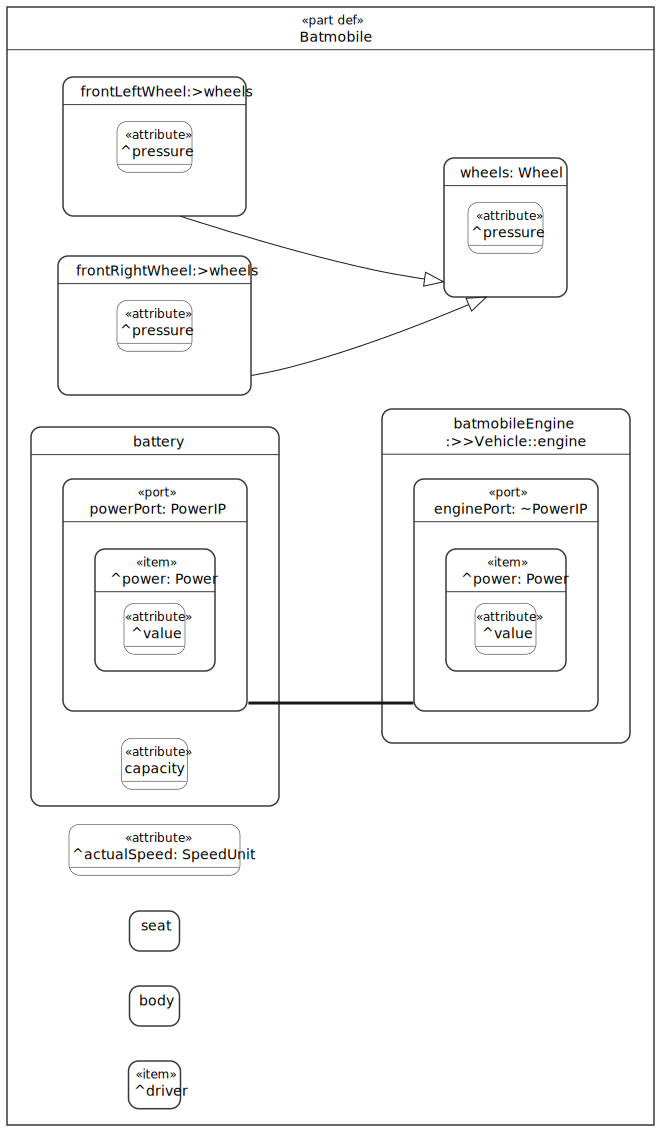

In [439]:
%viz --view=INTERCONNECTION --style=LR --style=SHOWINHERITED Batmobile_Architecture::Stage_4_Physical::Definitions::Batmobile

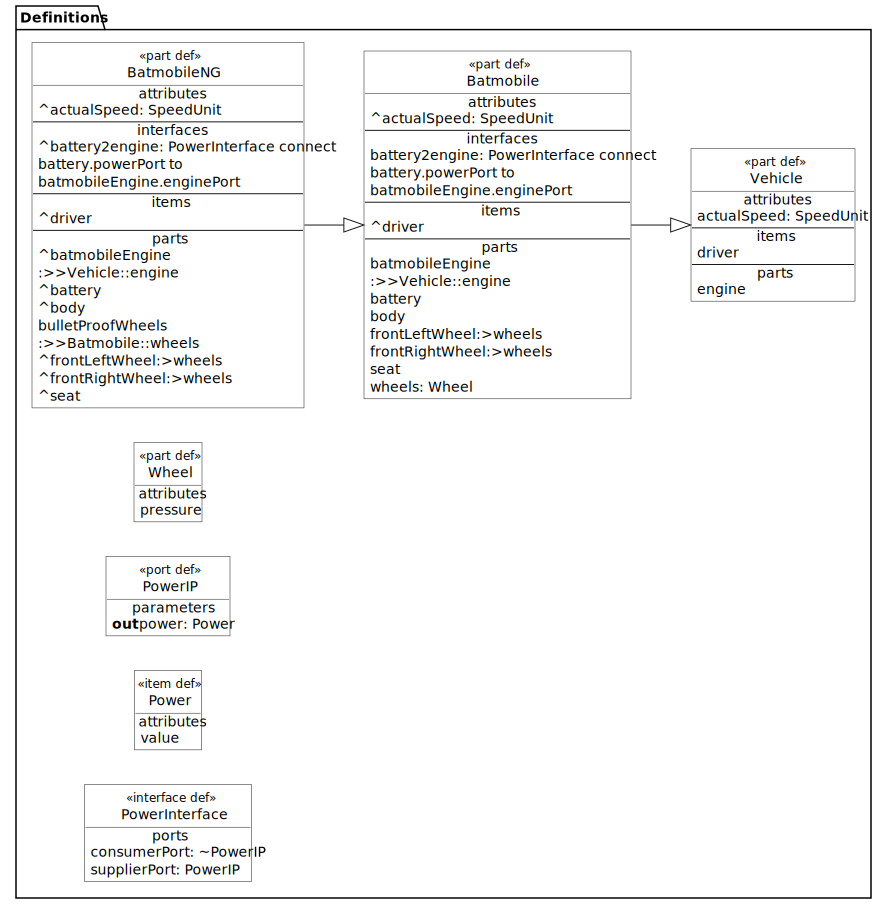

In [429]:
%viz --view=TREE --style=LR --style=ORTHOLINE --style=COMPMOST --style=SHOWINHERITED Batmobile_Architecture::Stage_4_Physical::Definitions

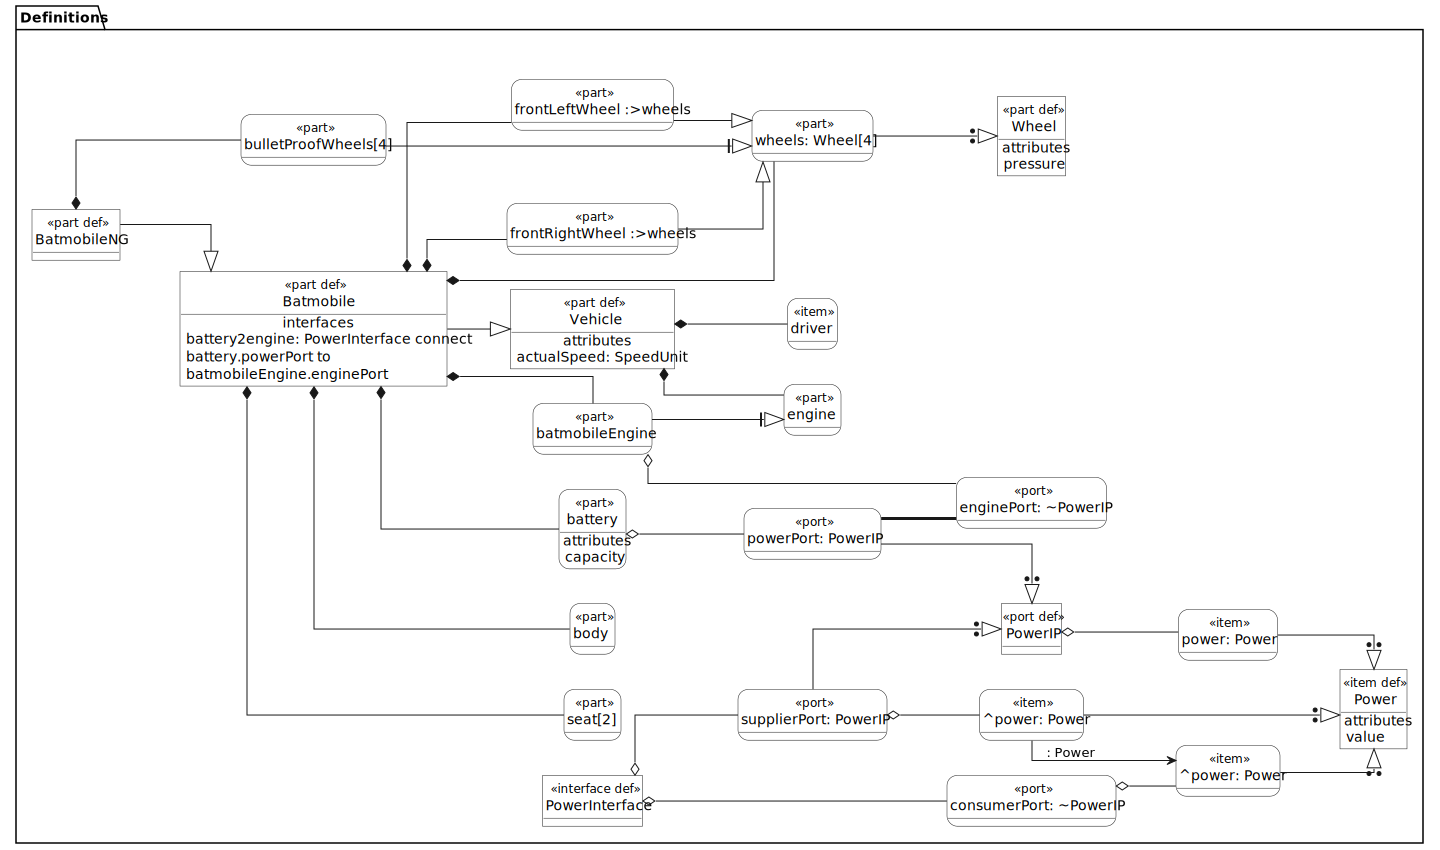

In [425]:
%viz --view=TREE --style=LR --style=ORTHOLINE Batmobile_Architecture::Stage_4_Physical::Definitions